In [1]:
# load the data
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

data = np.load("digits389.npy", allow_pickle=True).item()


In [2]:
X_train = data["Xtrain"]
Y_train = data["Ytrain"]
X_test = data["Xtest"]
Y_test = data["Ytest"]

In [3]:
def LDA_feature(X,Y):
    # rename y features to enable indexing
    y_indices = np.array([np.squeeze(np.where(y_i == np.unique(Y))) for y_i in Y])
    # compute parameters
    mu = np.mean(X, axis=0)
    mu_class = np.array([np.mean(X[Y==k, :], axis=0) for k in np.unique(Y)])
    within = np.sum([np.outer(X[index, :] - mu_class[y_index], X[index, :] - mu_class[y_index]) for index, y_index in enumerate(y_indices)], axis=0)
    between_class = np.sum([np.count_nonzero(Y==y_i)* np.outer(mu_class_i - mu, mu_class_i - mu) for mu_class_i, y_i in zip(mu_class, np.unique(Y))], axis=0)
    # comute eigennvalues, vectors and sort them
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within).dot(between_class))
    # eigen_values, eigen_vectors = scipy.linalg.eig(between_class, within)
    eigen_vectors = eigen_vectors[:,np.argsort(eigen_values)]
    eigen_vectors = eigen_vectors[:,-(len(np.unique(Y)))+1:]
    # project training points on the largest two eigenvectors
    return eigen_vectors, X @ eigen_vectors

C:\Eigene Programme\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


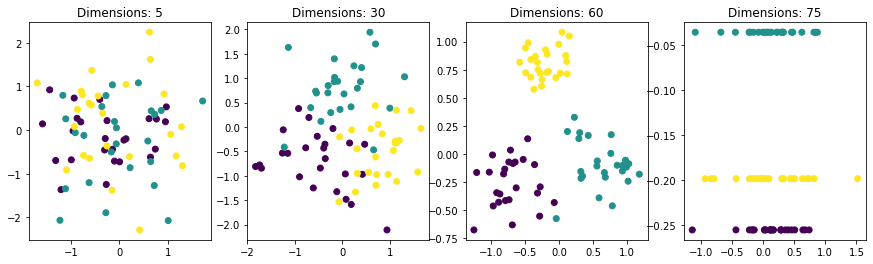

In [4]:
dimensions = [5, 30, 60, 75]
samples=25
fig, axs = plt.subplots(1, len(dimensions))
for index, d in enumerate(dimensions):
    X = np.random.randn(3*samples,d)
    Y = np.repeat([1,2,3], samples)
    vectors, values = LDA_feature(X, Y)
    axs[index].scatter(values[:,0], values[:,1], c=Y)
    axs[index].set_title(f"Dimensions: {d}")
    axs[index].figure.set_size_inches(15, 4)

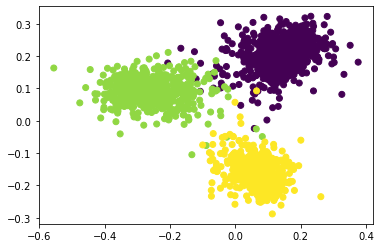

In [5]:
plt.figure()
vecs, vals = LDA_feature(X_train, Y_train)
plt.scatter(vals[:, 0], vals[:, 1], c=Y_train)

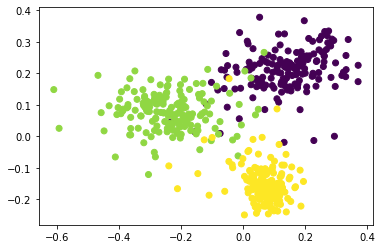

In [6]:
plt.figure()
vals = X_test @ vecs
plt.scatter(vals[:, 0], vals[:, 1], c=Y_test)